In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('//cbio//users//shelbylabuschagne//shelby_labuschagne//84185//JAAMH//CIDR_AlcoholDependence//phs000425v1//p1//phenotype//phs000425.v1.pht002503.v1.p1.c1.dbGAP_phenotype.ARC.txt', sep="\t", skiprows=10)


x=data.loc[:, data.columns != 'alcdep']
del x["SUBJID"]
y = data["alcdep"]
x

,A1_SEX,A4_AGE,A8a_RACE,adhd,Agoraphobia,aspd,Bipolar1,Bipolar2,cip,CD,...,seddep,stimdep,tobdep,AlcDep_Item1,AlcDep_Item2,AlcDep_Item3,AlcDep_Item4,AlcDep_Item5,AlcDep_Item6,AlcDep_Item7
0,2,27,4,1,1,1,1,1,1,1,...,1,1,1,2,1,2,1,2,1,1
1,1,63,4,1,1,1,1,1,2,1,...,1,1,1,1,2,2,2,2,1,1
2,1,39,4,2,1,1,1,1,1,2,...,0,0,1,2,2,2,2,2,2,2
3,1,40,4,1,1,1,1,1,2,1,...,1,1,1,2,1,2,2,2,1,1
4,2,41,4,1,1,1,1,1,2,1,...,1,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,1,36,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2905,2,27,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2906,2,38,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2907,2,26,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
from sklearn.manifold import TSNE
df = data

features = df.loc[:, :'alcdep']

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(features, )

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig.update_traces(marker_size=8)
fig.show()

ValueError: could not convert string to float: 'Yale_0001'

In [4]:
#setting up the x and y data for KNN
np.random.seed(42)
x=data.loc[:, data.columns != 'alcdep']
del x["SUBJID"]
y = data["alcdep"]

#set up the test and training data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#scaling the data for the best results 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#evaluation of the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108   1]
 [  3 470]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       109
           2       1.00      0.99      1.00       473

    accuracy                           0.99       582
   macro avg       0.99      0.99      0.99       582
weighted avg       0.99      0.99      0.99       582



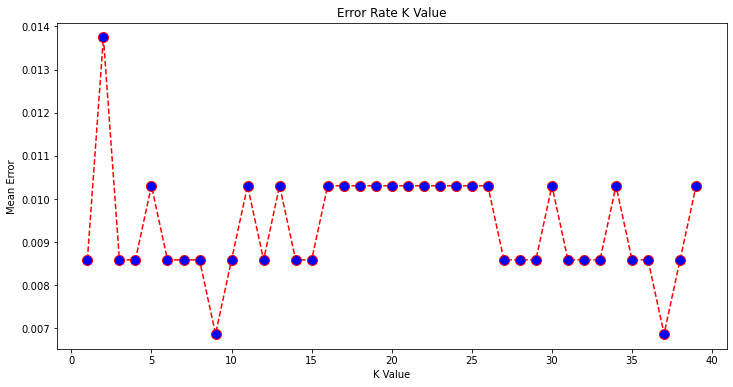

In [5]:
import matplotlib.pyplot as plt

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('/users/shelbylabuschagne/Data Exploration/KNN.png', bbox_inches="tight")

In [7]:
#One of the first dimensionality methods that were applied was PCA. In simple terms PCA works by transforming
#the large dataset with many variables into a smaller dataset that will contain as much information
#in the dataset as possible.


#PCA second time - no normalisation
#It is using the correlation between some dimensions and tries to provide a minimum number of 
#variables that keeps the maximum amount of variation or information about how the original data is distributed. 

#Set up variables 
from sklearn.decomposition import PCA
np.random.seed(42)
N=2909
#Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. 
#The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). 
#To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us later 
#to select the first five or ten thousand for our calculations and visualisations.
rndperm = np.random.permutation(data.shape[0])

df_subset = data
#data_subset = df_subset[feat_cols].values
del df_subset["SUBJID"]


pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.94770039 0.01369825 0.00761888]


Populating the interactive namespace from numpy and matplotlib


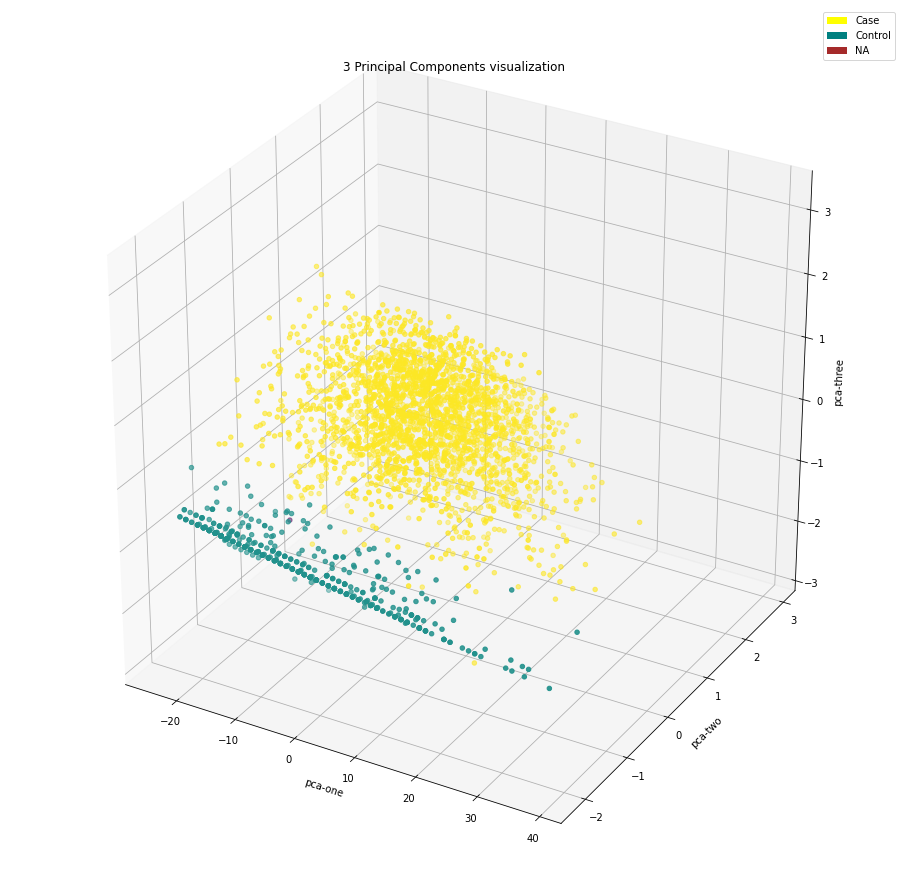

In [11]:
#3D rep of PCA components = 3
%pylab inline
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

y=df_subset["alcdep"]


xs=df_subset["pca-one"] 
ys=df_subset["pca-two"]
zs=df_subset["pca-three"]  
    
    
ax = plt.figure(figsize=(16,16)).gca(projection='3d')
ax1=ax.scatter(xs,ys,zs,c=y)



plt.title('3 Principal Components visualization')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

p = Rectangle((0, 0), 1, 1, fc="yellow")
q = Rectangle((0, 0), 1, 1, fc="teal")
r = Rectangle((0, 0), 1, 1, fc="brown")
legend([p,q,r], ["Case","Control","NA"])

plt.savefig('/users/shelbylabuschagne/Data Exploration/AAPCA.png', bbox_inches="tight")
plt.show()

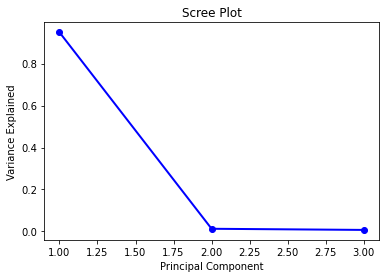

In [6]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('/users/shelbylabuschagne/Data Exploration/AAScreePlot.png', bbox_inches="tight")
plt.show()

In [5]:
#setting up the x and y data for KNN
from sklearn.metrics import accuracy_score

np.random.seed(42)
x=data.loc[:, data.columns != 'alcdep']
del x["SUBJID"]
y = data["alcdep"]

#set up the test and training data for the model
#splitting dataset into a training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)

#fitting logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='liblinear')
classifier.fit(x_train, y_train)

#predicting results
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test,y_pred))

accuracy score: 0.9879725085910653


In [6]:
#tSNE
np.random.seed(42)

#set up the test and training data for the model
#splitting dataset into a training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

from sklearn.manifold import TSNE
import time
time_start = time.time()
RS=123
fashion_tsne = TSNE(random_state=RS).fit_transform(x_train, y_train)
print("tSNE done! Time elapsed: {} seconds".format(time.time()-time_start))

#cannot do transform on TSNE 

tSNE done! Time elapsed: 27.437912225723267 seconds


(-64.89819469451905,
 54.289426231384276,
 -115.90497436523438,
 91.93181457519532)

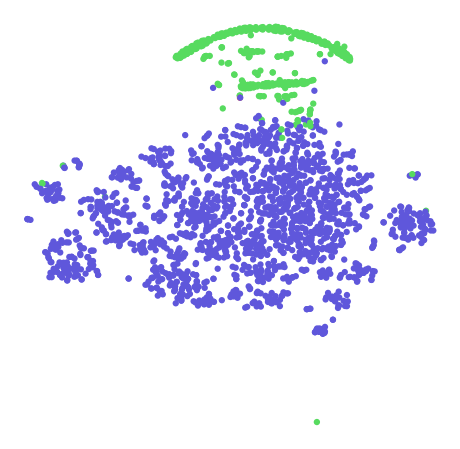

In [7]:
import seaborn as sns

num_classes = len(np.unique(y_train))
palette = np.array(sns.color_palette("hls", num_classes))

# create a scatter plot.
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(fashion_tsne[:,0], fashion_tsne[:,1], lw=0, s=40, c=palette[y_train.astype(np.int)])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

In [8]:
#ISOMAP

#import
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import Isomap
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

#setting up the x and y data
np.random.seed(42)
x=data.loc[:, data.columns != 'alcdep']
y = data["alcdep"]
del x["SUBJID"]

# define the pipeline
steps = [('iso', Isomap(n_components=9)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/users/shelbylabuschagne/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/users/shelbylabuschagne/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/users/shelbylabuschagne/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"
/users/shelbylabuschagne/

Accuracy: nan (nan)


/users/shelbylabuschagne/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'str' object has no attribute 'decode'

  warnings.warn("Estimator fit failed. The score on this train-test"


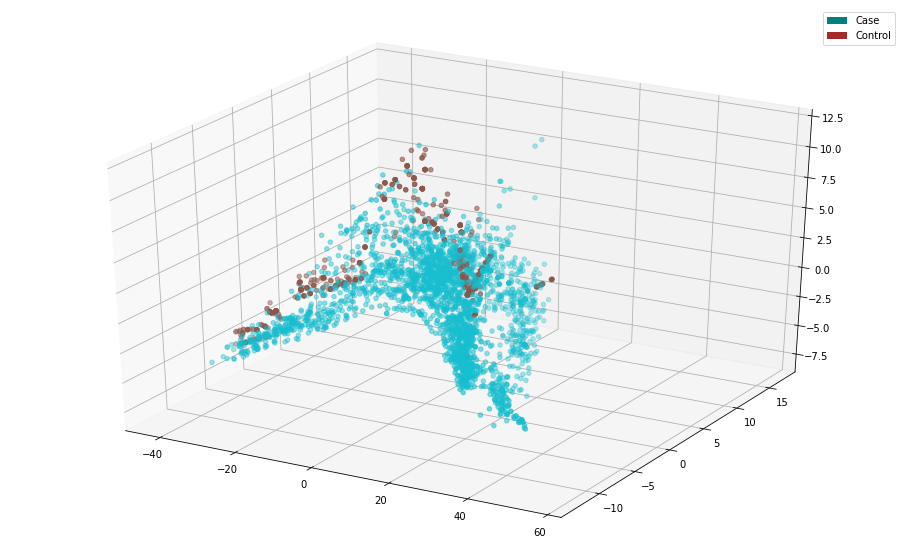

In [276]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=9)
projection = iso.fit_transform(x)

#3D rep of PCA components = 3
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=projection[:, 0],
    ys=projection[:, 1], 
    zs=projection[:, 2], 
    c=y, 
    cmap='tab10'
)


p = Rectangle((0, 0), 1, 1, fc="teal")
q = Rectangle((0, 0), 1, 1, fc="brown")
legend([p,q], ["Case","Control"])


plt.savefig('/users/shelbylabuschagne/Data Exploration/AAIsomap.png', bbox_inches="tight")
plt.show()


In [9]:
#MDS
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd


#read in the data again
print("read in again")
data = pd.read_csv('//cbio//users//shelbylabuschagne//shelby_labuschagne//84185//JAAMH//CIDR_AlcoholDependence//phs000425v1//p1//phenotype//phs000425.v1.pht002503.v1.p1.c1.dbGAP_phenotype.ARC.txt', sep="\t", skiprows=10)
x=data.loc[:, data.columns != 'alcdep']
del x["SUBJID"]
y = data["alcdep"]
print("deleted it all")



#this is causing a high stress for some reason 
del data["SUBJID"]
print("before MDS")
mds = MDS(random_state=0)
print("after mds")
X_transform = mds.fit_transform(x)
print(X_transform)

read in again
deleted it all
before MDS
after mds
[[ -9.34223863  -9.54497472]
 [ 15.2051384   17.20190212]
 [  1.68886736  -3.13138533]
 ...
 [ -3.18852743  -0.17762962]
 [-10.33671524 -10.03501538]
 [ -1.15539619   2.07458284]]


In [10]:
#minimize stress so look at stress variable 
#Normally, MDS is used to provide a visual representation of a complex set of relationships that can be scanned at a glance. 
#Since maps on paper are two-dimensional objects, this translates technically to finding an optimal configuration of points in 2-dimensional space. 
#However, the best possible configuration in two dimensions may be a very poor, highly distorted, representation of your data. 
#If so, this will be reflected in a high stress value. When this happens, you have two choices: you can either abandon MDS as a method of representing 
#your data, or you can increase the number of dimensions.
stress = mds.stress_
print(stress)

1842538.0973774837


In [ ]:
#Another method of applying MDS is by constructing a distance matrix and applying MDS directly to this matrix as shown in the code below. 
#This method is useful when a distance measure other than Euclidean distance is required. 
#The code below computes the pairwise Manhattan distances (also called the city block distance or L1 distance) and transforms the data via MDS.

dist_manhattan = manhattan_distances(x)
print('distance matrix done')
mds = MDS(dissimilarity='precomputed', random_state=0)
print('mds done')
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)
print('x transform done')
print(X_transform_L1)

distance matrix done
mds done


In [ ]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification
import pandas as pd


print('reading ing')
data = pd.read_csv('//cbio//users//shelbylabuschagne//shelby_labuschagne//84185//JAAMH//CIDR_AlcoholDependence//phs000425v1//p1//phenotype//phs000425.v1.pht002503.v1.p1.c1.dbGAP_phenotype.ARC.txt', sep="\t", skiprows=10)
x=data.loc[:, data.columns != 'alcdep']
del x["SUBJID"]
y = data["alcdep"]
print('data done')

model = MDS(n_components=9)
print("MDS components done")
out = model.fit_transform(x)

Populating the interactive namespace from numpy and matplotlib


NameError: name 'out' is not defined

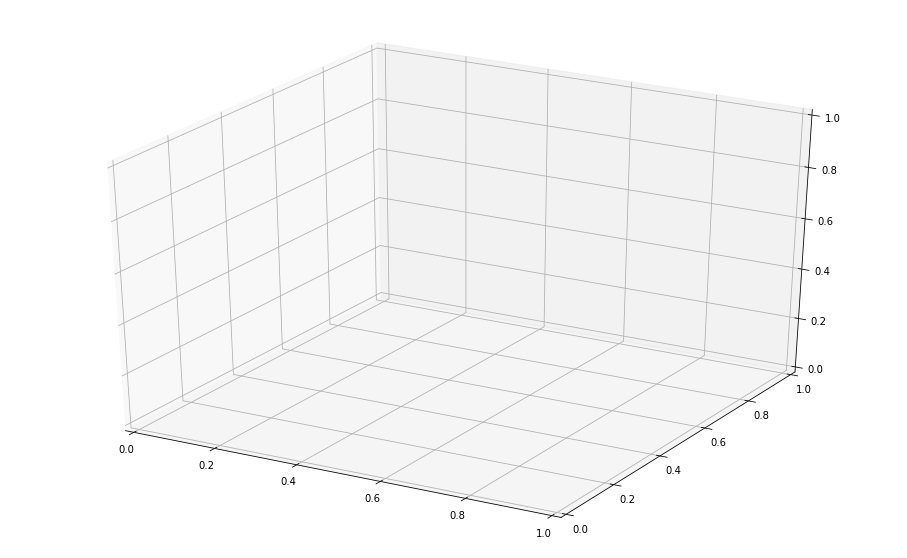

In [1]:
#3D rep of MDS - Hopefully
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%pylab inline
import matplotlib.ticker as mtick

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    zs=out[:, 0],
    ys=out[:, 1], 
    xs=out[:, 2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('one')
ax.set_ylabel('two')
ax.set_zlabel('three')

p = Rectangle((0, 0), 1, 1, fc="Aqua")
q = Rectangle((0, 0), 1, 1, fc="Brown")
legend([p,q], ["Case","Control"])

ax.set_title("MDS visualization")
plt.savefig('/users/shelbylabuschagne/Data Exploration/MDSNESARC.png', bbox_inches="tight")
plt.show()

In [ ]:
## ISOMAP
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS

print("training and test data")
#set up the test and training data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print("done training and test data")


print("before MDS")
model = MDS(n_components=9)
print("MDS components done")
x_train = model.fit_transform(X_train)
x_test = model.fit_transform(X_test)
print("Done")


#fitting logistic Regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='liblinear')
classifier.fit(x_train, y_train)

#predicting results
y_pred = classifier.predict(x_test)
print("accuracy score:", accuracy_score(y_test,y_pred))